<a href="https://colab.research.google.com/github/li199959/one/blob/main/%E2%80%9C3%E6%AD%A5%E6%95%B0%E6%8D%AE%E5%A4%84%E7%90%86_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import zipfile
import os
import csv

def extract_matching_data(zip_file_path, output_csv_path):
    # Temporarily extract zip file
    temp_folder = "/tmp/RoCE_4np_3_testlog"
    with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
        zip_ref.extractall(temp_folder)

    # Find all run-a2a.log files
    log_files = {}
    for root, dirs, files in os.walk(temp_folder):
        for file in files:
            if file.endswith("run-bc.log") and not root.startswith(os.path.join(temp_folder, '__MACOSX')):
                log_files[os.path.join(root, file)] = True

    # Given data to match against
    data_to_match = [
        "1073741824       268435456     float    none      -1",
        "4294967296      1073741824     float    none      -1"
    ]

    # Extract matching lines from log files
    extracted_data = []
    for log_file in log_files:
        with open(log_file, 'r') as file:
            lines = file.readlines()
            for line in lines:
                for data in data_to_match:
                    if data.split()[0] in line and data.split()[1] in line:
                        extracted_data.append(line.strip())

    # Save the extracted data to a CSV file
    with open(output_csv_path, "w", newline='') as csv_file:
        writer = csv.writer(csv_file)
        writer.writerow(["Data"])  # Header
        for row in extracted_data:
            writer.writerow([row])

    print(f"Data saved to {output_csv_path}")

# Usage:
zip_file_path = "RoCE_4np_3_testlog.zip"
output_csv_path = "desired_output_path.csv"
extract_matching_data(zip_file_path, output_csv_path)


Data saved to desired_output_path.csv


In [ ]:
  a2a  1073741824       8388608     float    none      -1    37792   28.41   27.52      0    34948   30.72   29.76    N/A
  2147483648      16777216     float    none      -1    73378   29.27   28.35      0    70575   30.43   29.48    N/A
  4294967296      33554432     float    none      -1   148036   29.01   28.11      0   148662   28.89   27.99    N/A

In [ ]:
  1073741824     268435456     float     sum      -1    11547   92.99  180.17      0    11750   91.38  177.06      0
  2147483648     536870912     float     sum      -1    23190   92.60  179.42      0    23322   92.08  178.41      0
  4294967296    1073741824     float     sum      -1    46422   92.52  179.26      0    46255   92.85  179.90      0

In [ ]:
a2a
  1073741824       8388608     float    none      -1    34925   30.74   29.78      0    35347   30.38   29.43    N/A
  2147483648      16777216     float    none      -1    70530   30.45   29.50      0    70096   30.64   29.68    N/A
  4294967296      33554432     float    none      -1   139802   30.72   29.76      0   139360   30.82   29.86    N/A

In [ ]:

  ag
  1073741824       8388608     float    none      -1   5813.0  184.71  178.94      0   5823.3  184.39  178.63      0
  2147483648      16777216     float    none      -1    11563  185.72  179.92      0    11543  186.04  180.23      0
  4294967296      33554432     float    none      -1    23064  186.22  180.40      0    23669  181.46  175.79      0


In [ ]:
ar
  1073741824     268435456     float     sum      -1    11547   92.99  180.17      0    11750   91.38  177.06      0
  2147483648     536870912     float     sum      -1    23190   92.60  179.42      0    23322   92.08  178.41      0
  4294967296    1073741824     float     sum      -1    46422   92.52  179.26      0    46255   92.85  179.90      0

In [ ]:
bc
  1073741824     268435456     float    none       0   6635.8  161.81  161.81      0   6640.8  161.69  161.69      0
  2147483648     536870912     float    none       0    12507  171.70  171.70      0    12502  171.77  171.77      0
  4294967296    1073741824     float    none       0    24187  177.57  177.57      0    24822  173.03  173.03      0

In [6]:
import pandas as pd

def process_file(file_path):
    """
    Processes the given CSV file by:
    1. Splitting the single column based on spaces.
    2. Extracting the 1st and 8th values.
    3. Grouping the data based on the first value.
    4. Saving the groups as separate CSV files.

    Parameters:
    - file_path (str): Path to the CSV file.

    Returns:
    - tuple: Paths to the saved CSV files for the two groups.
    """
    # Load the CSV file
    data = pd.read_csv(file_path)

    # Split the data based on spaces and extract the 1st and 8th values
    split_data = data.iloc[:, 0].str.split(expand=True)
    selected_values = split_data.iloc[:, [0, 7]]

    # Group the data based on the first column and store each group separately
    grouped = dict(tuple(selected_values.groupby(0)))

    # Get the distinct values from the first column
    distinct_values = list(grouped.keys())

    # Extract data for each distinct value
    group1 = grouped[distinct_values[0]]
    group2 = grouped[distinct_values[1]]

    # Generate file names for the output
    base_name = file_path.split('/')[-1].replace('.csv', '')
    group1_path = f"{base_name}_group_{distinct_values[0]}.csv"
    group2_path = f"{base_name}_group_{distinct_values[1]}.csv"

    # Save the groups to CSV files
    group1.to_csv(group1_path, index=False)
    group2.to_csv(group2_path, index=False)

    return group1_path, group2_path

# Example usage:
file_paths = ['roce-a2a.csv','roce-ag.csv','roce-ar.csv','roce-bc.csv']
for file_path in file_paths:
    group1_path, group2_path = process_file(file_path)
    print(f"Processed {file_path} -> {group1_path}, {group2_path}")


Processed roce-a2a.csv -> roce-a2a_group_1073741824.csv, roce-a2a_group_4294967296.csv
Processed roce-ag.csv -> roce-ag_group_1073741824.csv, roce-ag_group_4294967296.csv
Processed roce-ar.csv -> roce-ar_group_1073741824.csv, roce-ar_group_4294967296.csv
Processed roce-bc.csv -> roce-bc_group_1073741824.csv, roce-bc_group_4294967296.csv


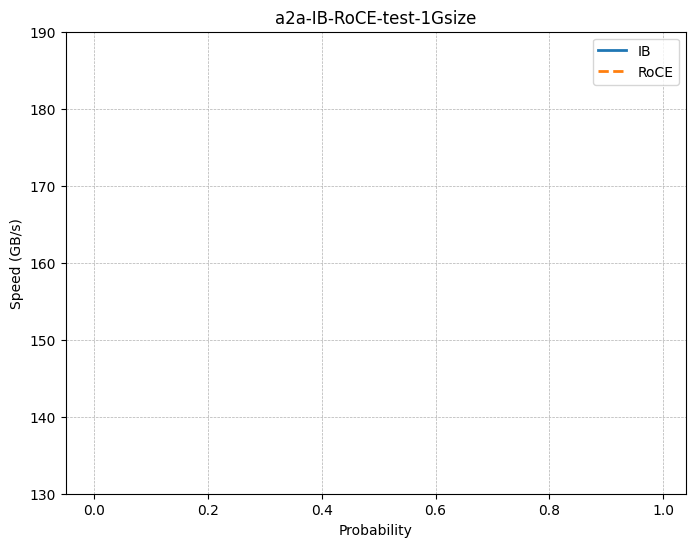

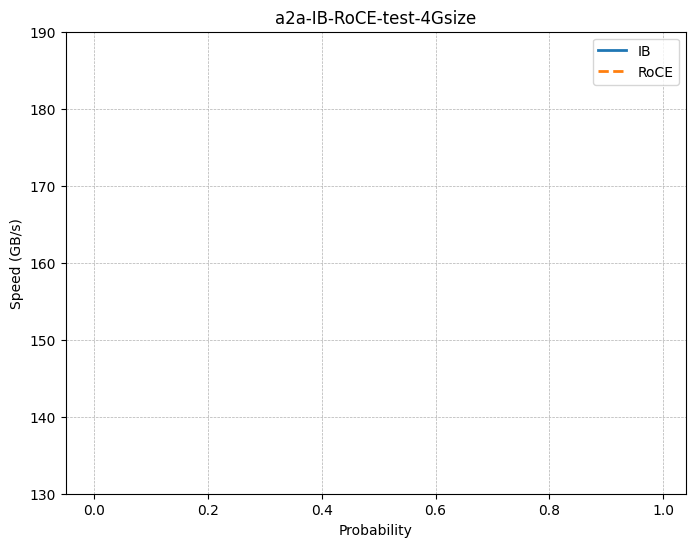

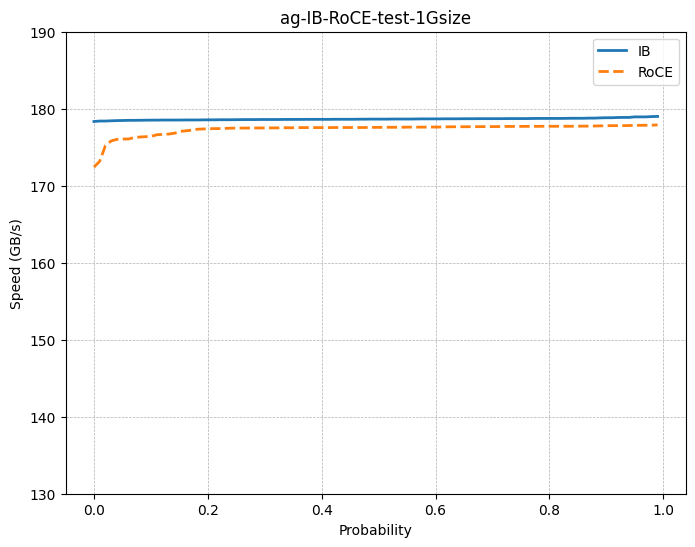

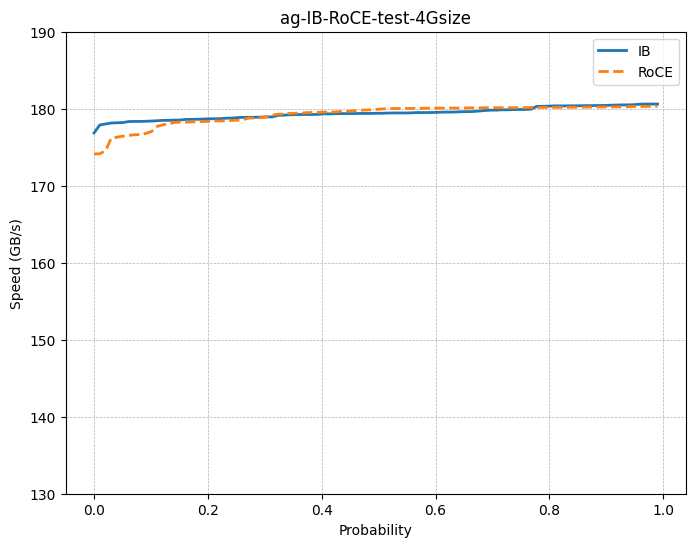

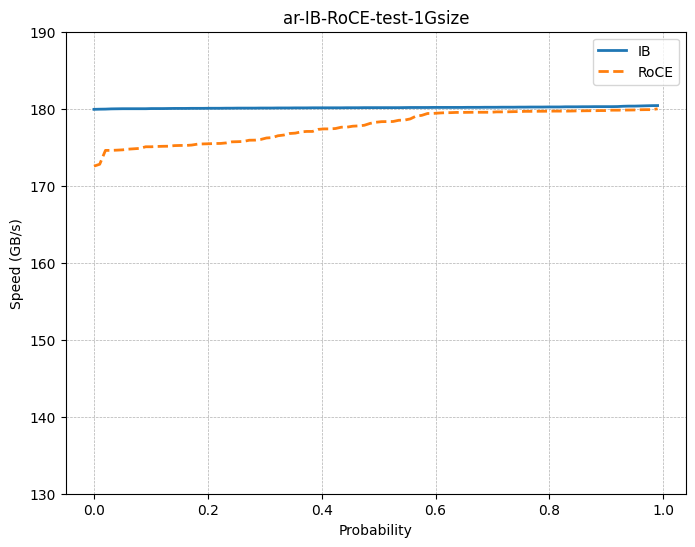

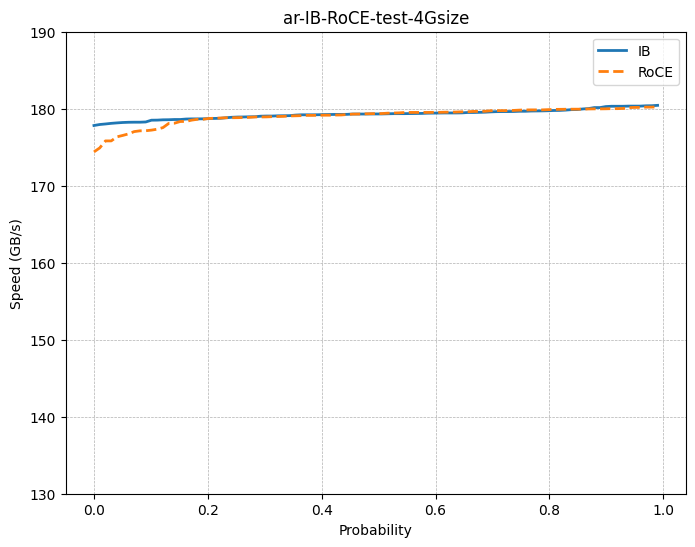

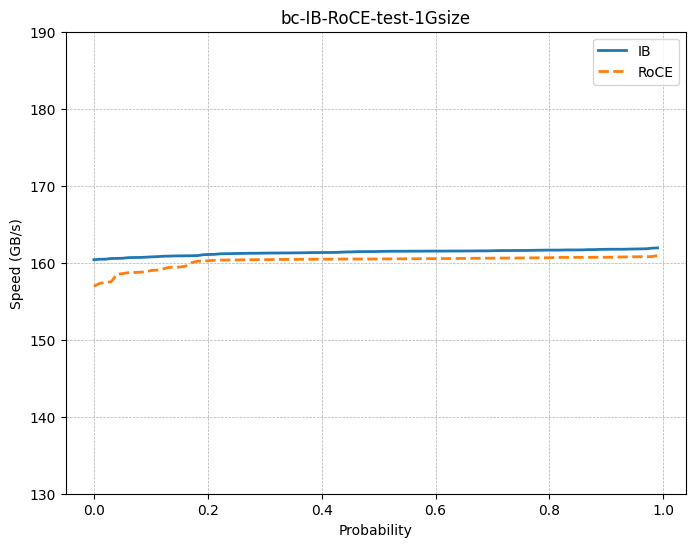

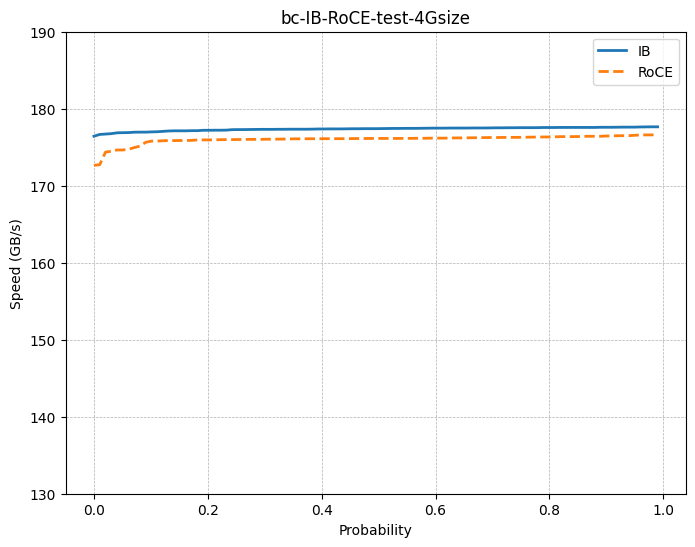

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the datasets
file_names = [
    "a2a-IB-RoCE-test-1Gsize.csv", "a2a-IB-RoCE-test-4Gsize.csv",
    "ag-IB-RoCE-test-1Gsize.csv", "ag-IB-RoCE-test-4Gsize.csv",
    "ar-IB-RoCE-test-1Gsize.csv", "ar-IB-RoCE-test-4Gsize.csv",
    "bc-IB-RoCE-test-1Gsize.csv", "bc-IB-RoCE-test-4Gsize.csv"
]
dataframes = {name: pd.read_csv(f"{name}") for name in file_names}

def plot_cdf_with_roce(data_ib, data_roce, title):
    """Plot CDF for both IB and RoCE data."""
    sorted_data_ib = np.sort(data_ib)
    sorted_data_roce = np.sort(data_roce)
    yvals = np.arange(len(sorted_data_ib)) / float(len(sorted_data_ib))

    plt.figure(figsize=(8, 6))
    plt.plot(yvals, sorted_data_ib, label="IB", lw=2)
    plt.plot(yvals, sorted_data_roce, label="RoCE", lw=2, linestyle='--')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xlabel('Probability')
    plt.ylabel('Speed (GB/s)')
    plt.title(title)
    plt.legend()
    plt.ylim(130, 190)  # Adjusting y-axis range
    plt.show()

# Plotting individual CDFs for both IB and RoCE for each dataset
for file_name, dataframe in dataframes.items():
    plot_cdf_with_roce(dataframe.iloc[:, 1].values, dataframe.iloc[:, 2].values, file_name[:-4])
